# D209 Task 1 Performance Assessment

## Classification Analysis

### WGU

### Ryan Russon

### Student ID: 010337779

### 01/22/2024


## Part I: Research Question


### A. Purpose of Data Mining Report

#### Proposed Question (Using Naive Bayes):

    - Research Question: Can we predict patient readmission using the known medical data?
    
    - Goal: To accurately predict the likelihood of readmission and identify the most significant predictor variables.
    
    
## Part II: Method Justification


### B. Classification Method Justification

#### Analysis with Chosen Method:

    - Naive Bayes is based on Bayes' Theorem, which uses the probabilities of events.
    
    - Each data point's probability is calculated independently as a feature and then combined and normalized.
    
    - Naive Bayes is good at handling large amounts of data with high dimensions.
    
    - Expected outcome: The outcomes will be classified as "Yes" or "No" in terms of the likelihood of readmission.
    
#### Assumption of Naive Bayes:

    - The most significant assumption that the Naive Bayes method has is the assumption of independence. It assumes conditional independence and that no independent variable will directly predict another. In other words, one feature's presence or absence should be unrelated to another feature's presence or absence.
    
#### Python Packages:

    - Pandas library is ideal for data manipulation and cleaning. It allows easy handling of missing data, data filtering, and aggregation, essential for preparing a dataset for regression analysis.
    
    - NumPy: Useful for numerical computations, which can be important when transforming data for regression analysis.

    - Reasearchpy: Useful for Cramer V metric, helpful in identifying correlation between multiple categorical variables.

    - Scikit-learn: This library provides extensive functionalities for implementing classification models, scaling data, cross-validationcross-validating, and evaluating model performance through various metrics.


## Part III: Data Preparation


### C. Data Preparation

#### Data Preprocessing Goal:

    - To clean, transform, and normalize the data to be suitable for Naive Bayes, which includes handling missing values, encoding categorical variables, and normalizing numerical values.
    
    - Due to Naive Bayes's assumption of independence, data preprocessing will focus on filtering out inappropriate variables.
    
#### Initial Dataset Variables:

    - Initial Variables will include all features brought in from the CSV.
    - Through exploratory data analysis, we will limit this to only the appropriate features.
    
    - See attached CSV for all independent variables used in the final model.
    - See the code below for all independent variables from the start to finish of the analysis.

#### Data Preparation Steps:

    - Load data: data = pd.read_csv('file_path')
    - Handle missing values: data.fillna(method='ffill')
    - Check for independence assumptions and eliminate inappropriate features
    - Encode categorical data: pd.get_dummies(data)
    
#### Cleaned Dataset:

    - Provide the cleaned dataset after these preprocessing steps.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, roc_curve, roc_auc_score)

df = pd.read_csv('C:/Users/Ryan/OneDrive/Desktop/WGU_Study/D209/Data Sets and Dictionaries/medical_clean.csv')
df.info()
df.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

False

In [142]:
all_cols = df.columns
print('All Columns \n', all_cols, '\n')

num_cols = df.select_dtypes(include=['number']).columns
bad_cols = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
num_cols = num_cols.difference(bad_cols)
print('Numeric Columns \n', num_cols, '\n')

cat_cols = all_cols.difference(num_cols)
bad_cols_2 = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Job', 'CaseOrder', 'Lat', 'Lng', 'Zip']
cat_cols = cat_cols.difference(bad_cols_2)
print('Categorical Columns \n', cat_cols, '\n')


All Columns 
 Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object') 

Numeric Columns 
 Index(['Additional_charges', 'Age', 'Children', 'Doc_visits',
       'Full_meals_eaten', 'Income', 'Initial_days', 'Population',
       'TotalCharge', 'VitD_levels', 'vitD_supp'],
      dtype='object') 

Categorical Columns 
 Index(['Allergic_rhinitis', 'Anxiety', '

In [143]:
df[num_cols].describe()

,Additional_charges,Age,Children,Doc_visits,Full_meals_eaten,Income,Initial_days,Population,TotalCharge,VitD_levels,vitD_supp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12934.528587,53.511700,2.097200,5.012200,1.001400,40490.495160,34.455299,9965.253800,5312.172769,17.964262,0.398900
std,6542.601544,20.638538,2.163659,1.045734,1.008117,28521.153293,26.309341,14824.758614,2180.393838,2.017231,0.628505
min,3125.703000,18.000000,0.000000,1.000000,0.000000,154.080000,1.001981,0.000000,1938.312067,9.806483,0.000000
25%,7986.487755,36.000000,0.000000,4.000000,0.000000,19598.775000,7.896215,694.750000,3179.374015,16.626439,0.000000
50%,11573.977735,53.000000,1.000000,5.000000,1.000000,33768.420000,35.836244,2769.000000,5213.952000,17.951122,0.000000
75%,15626.490000,71.000000,3.000000,6.000000,2.000000,54296.402500,61.161020,13945.000000,7459.699750,19.347963,1.000000
max,30566.070000,89.000000,10.000000,9.000000,7.000000,207249.100000,71.981490,122814.000000,9180.728000,26.394449,5.000000


In [144]:
for column in cat_cols:
    print(df[column].value_counts())

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64
No     6785
Yes    3215
Name: Anxiety, dtype: int64
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64
No     6426
Yes    3574
Name: Arthritis, dtype: int64
No     7107
Yes    2893
Name: Asthma, dtype: int64
No     5886
Yes    4114
Name: BackPain, dtype: int64
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64
No     7262
Yes    2738
Name: Diabetes, dtype: int64
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64
No     5910
Yes    4090
Name: HighBlood, dtype: int64
No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: Item1, dtype: int64
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: Item2, dtype: in


#### Assumption of Indepence Data Preprocessing

- To start we will ensure that our data is appropriately independent and can work with a Naive Bayes model, which has a large assumption of independence between features.

##### Evaluate and Fix Correlation (Linear and Non-Linear) between Numerical Features


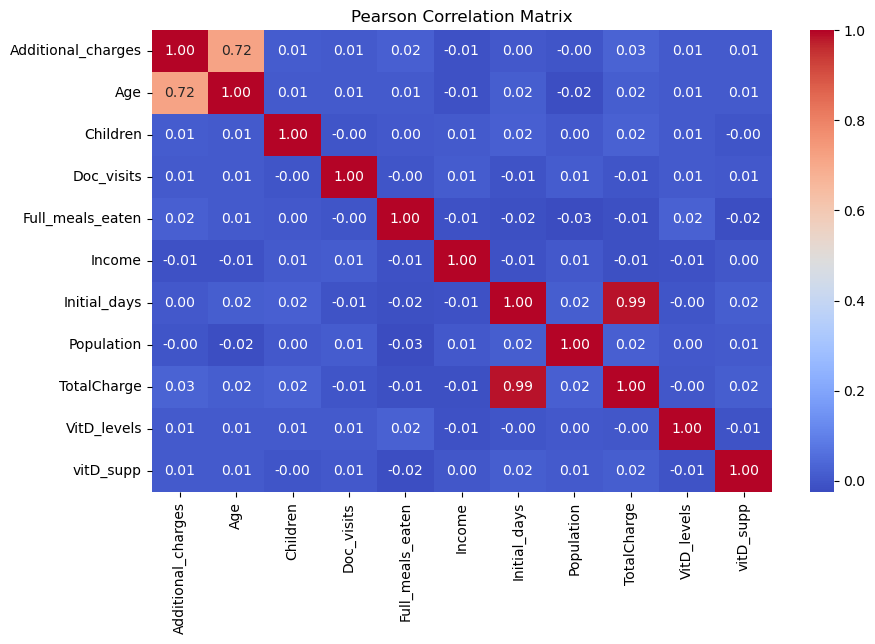

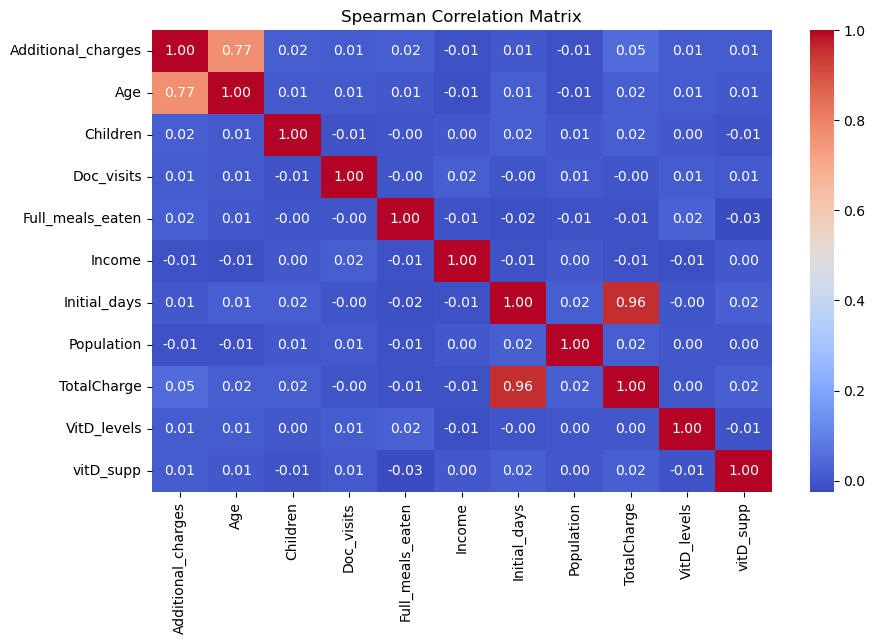

In [145]:
pearson_correlation_matrix = df[num_cols].corr()

spearman_correlation_matrix = df[num_cols].corr(method='spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()


##### Evaluate and Fix Correlation between Categorical Features


In [146]:
cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        table, results = rp.crosstab(df[col1], df[col2], test='chi-square')
        cramers_v_matrix.loc[col1, col2] = results.loc[2, 'results']
        
cramers_v_matrix = cramers_v_matrix.astype(float)

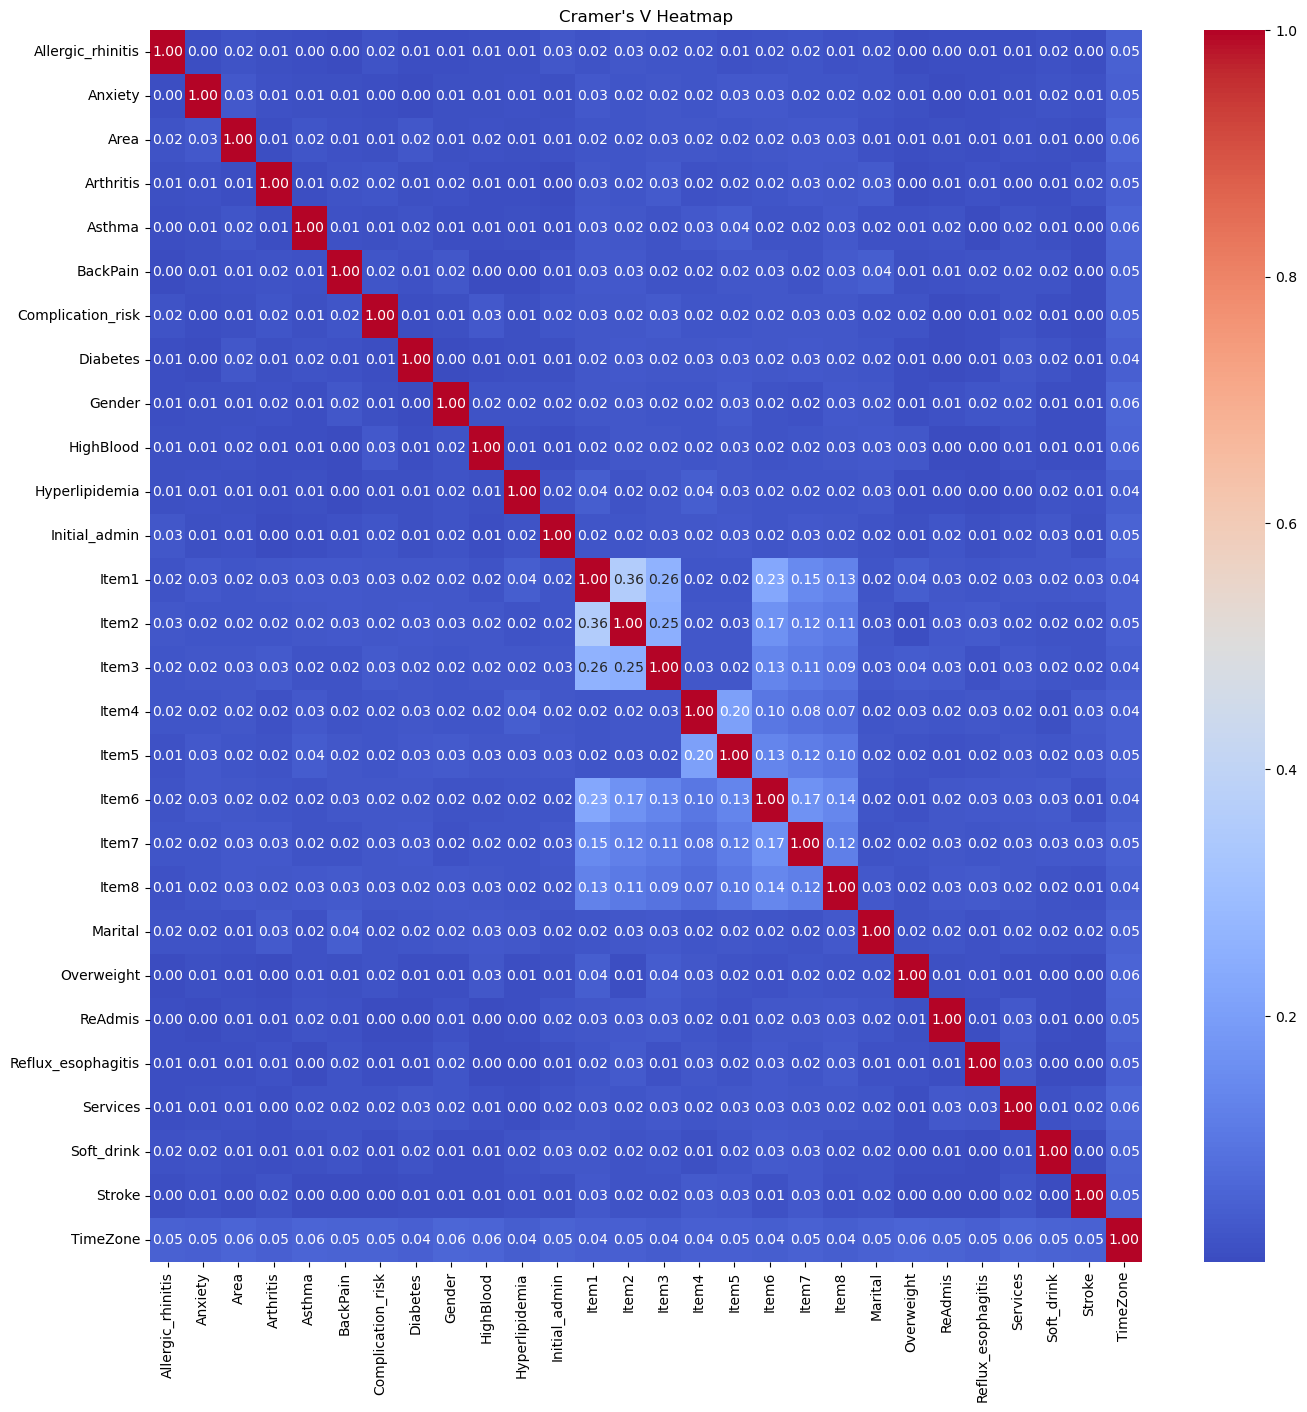

In [147]:
plt.figure(figsize=(16, 16))
sns.heatmap(cramers_v_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cramer\'s V Heatmap')
plt.show()

In [148]:
num_cols = num_cols.difference(['Additional_charges', 'TotalCharge'])

#### Assumption of Independence Data Preprocessing Conclusion

From our correlation matrices for our numerical variables, we see that there is a strong correlation between Age and additional charges, as well as between initial days and total charge.

    - To maintain the independence of features, we will remove the Additional_charges and TotalCharge features.
    
Our Cramer's V Heatmap shows the correlation between all our categorical variables. We use a correlation threshold of 0.5 since a value of 0.00 shows no correlation, and a value of 1.00 shows perfect correlation. No categorical variables violate the independence assumption under this threshold.

    - There is no need to alter any categorical variables due to correlations in the Cramer V Heatmap.
    
    
#### Encoding Categorical Variables


In [149]:
cat_cols = cat_cols.difference(['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'TimeZone'])
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)

ind_cols = num_cols.union(df_dummies.columns)
ind_cols = ind_cols.difference(['ReAdmis_Yes'])

print(ind_cols)

print(df_dummies.head())

Index(['Age', 'Allergic_rhinitis_Yes', 'Anxiety_Yes', 'Area_Suburban',
       'Area_Urban', 'Arthritis_Yes', 'Asthma_Yes', 'BackPain_Yes', 'Children',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Diabetes_Yes',
       'Doc_visits', 'Full_meals_eaten', 'Gender_Male', 'Gender_Nonbinary',
       'HighBlood_Yes', 'Hyperlipidemia_Yes', 'Income',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Initial_days',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Overweight_Yes', 'Population',
       'Reflux_esophagitis_Yes', 'Services_CT Scan', 'Services_Intravenous',
       'Services_MRI', 'Soft_drink_Yes', 'Stroke_Yes', 'VitD_levels',
       'vitD_supp'],
      dtype='object')
   Allergic_rhinitis_Yes  Anxiety_Yes  Area_Suburban  Area_Urban  \
0                      1            1              1           0   
1                      0            0              0           1   
2          



#### Finalizing Data Frame Post Data Preparation



In [150]:
df_dummies = pd.concat([df[num_cols], df_dummies], axis=1)

df_dummies = df_dummies.drop(columns=['Additional_charges', 'TotalCharge'], errors='ignore')

df_dummies.info()

print('\n', ind_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   Children                             10000 non-null  int64  
 2   Doc_visits                           10000 non-null  int64  
 3   Full_meals_eaten                     10000 non-null  int64  
 4   Income                               10000 non-null  float64
 5   Initial_days                         10000 non-null  float64
 6   Population                           10000 non-null  int64  
 7   VitD_levels                          10000 non-null  float64
 8   vitD_supp                            10000 non-null  int64  
 9   Allergic_rhinitis_Yes                10000 non-null  uint8  
 10  Anxiety_Yes                          10000 non-null  uint8  
 11  Area_Suburban                



#### Copy of Cleaned Data Set



df_dummies[ind_cols].to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D209\Part1Final.csv')



## Part IV: Analysis


### D. Data Analysis


#### Predictor vs Response Variable Split


- X represents a numpy array of features.

- y represents a numpy array of response variables.

In [152]:
y = df_dummies['ReAdmis_Yes'].values
X = df_dummies.drop('ReAdmis_Yes', axis=1).values

print(type(X), type(y))
X.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(10000, 36)

In [153]:
y.shape

(10000,)



#### Train-Test-Split/Scale/Cross-Validation/Hyperparameter-Tuning


- Scaler: A StandarScaler to scale all data. 

    *** Although this is not necessary for a Naive Bayes Model
    
- Split: We will use an 80/20 split for training/testing data.

- Hyperparameter Tuning: We will take 100 values between 1 and 10^-9 on a logarithmic scale.

- Cross Validation: We will use GridSearchCV to cross-validate the best hyperparameter.



In [154]:
steps = [('scaler', StandardScaler()), ('gaussian_nb', GaussianNB())]

pipeline = Pipeline(steps)

parameters = {'gaussian_nb__var_smoothing': np.logspace(0, -9, num=100)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_score_)

print(cv.best_params_)

0.962375
{'gaussian_nb__var_smoothing': 6.579332246575683e-05}




#### Final Model Metrics



In [155]:
var_smoothing_param = 6.579332246575683e-05

best_model = cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='weighted')

print('Accuracy: ', accuracy, '\n')
print('F1 Score: ', f1)

Accuracy:  0.959 

F1 Score:  0.9585832282773477


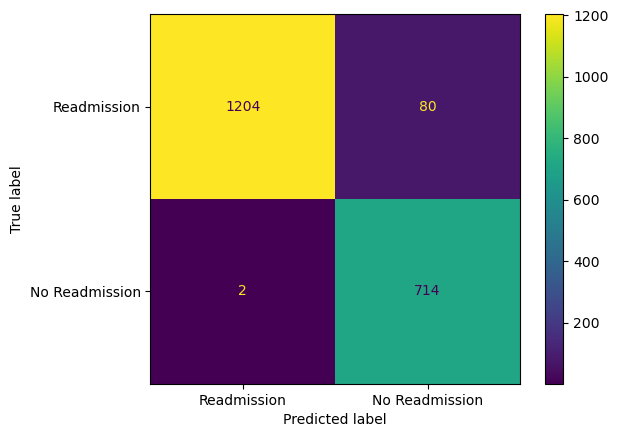

In [156]:
labels = ['Readmission', 'No Readmission']

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()

In [157]:
y_pred_probs = best_model.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

1.7109087631626065e-26


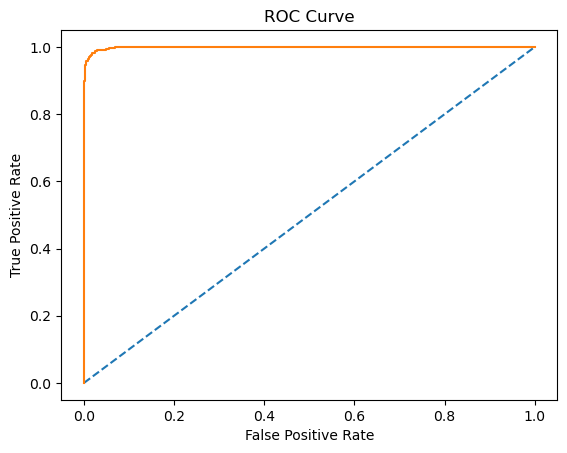

Area Under Curve ROC Score:  0.998156294053151


In [158]:
fpr, tpr, thrsholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Area Under Curve ROC Score: ', roc_auc_score(y_test, y_pred_probs))



## Part V: Data Summary and Implications


### E. Summary and Implications

#### Model Accuracy and AUC:

    - Accuracy Score:  0.959
    
        - This score was performed on our final model with the test data. This score ranges from 0 to 1 and evaluates the proportion of correct predictions over the total number of predictions. This score is relatively high and indicates that our model is accurate for classifying readmission.
        
    - F1 Score: 0.9585832282773477
    
        - The F1 score is a combination of precision and recall. It ranges from 0 to 1. This F1 score indicates that the model has a good balance of precision and recall.
        
    - ROC AUC Score: 0.998156294053151
    
        - The ROC AUC score measures the model's ability to distinguish between positive and negative classes. It ranges from 0.5 to 1. with 1 indicating a perfect distinction ability and 0.5 indicating no better than random distinction. This ROC AUC score is high and indicates that our model effectively distinguishes between positive and negative classes.

#### Discussion of Results and Implications:

    - Performance:
    
        - The model showed good scoring across all our metrics. It has a high accuracy score, F1 score, and ROC AUC score.
        
    - Implications:
    
        - This model could be highly effective in a healthcare setting. It can help identify patients at high risk of readmission and target these patients for specific preventative care. This model could be used in the future to reduce hospital readmission rates, which can improve resource efficiency and patient outcomes.

#### Limitation of Analysis:

    - Data:
    
        - The data could be of poor quality or a poor representation of an actual population. Inconsistent data could lead to bias in one way or another in the model.
        
    - Independence Assumption:
    
        - Although steps are taken to avoid invalidating the independence assumption, there is a possibility that the data is not fully independent. This particular model is very reliant on the independence assumption, and the failure of this assumption could limit the actual effects of the analysis.
        
    - Model Interpretation:
    
        - Although the probability interpretation is straightforward, digging into the model's influencing factors can be more difficult. Analysis into which features were most or least predictive could need the expertise of a healthcare provider with intimate knowledge of these fields and the expertise of someone who deeply understands how the model works under the hood.
        
    - Future Data Dynamics:
    
        - Medical data changes over time, and although this model may be accurate right now on this data, this data may need to be more effective and effective at identifying the likelihood of readmission.

#### Recommendation Based on Results:

    - This model should be implemented in a healthcare setting to identify a patient's readmission probability accurately. Identifying these patients alone will not change outcomes, but focusing further preventative care on the identified patients could improve readmission outcomes.
    
    - This model needs continuous monitoring and updating. Future data can change the model, which could be either fixed by updating or proven invalid by further evaluations.
    
    - This model does not alone predict which factors most influence the causation of readmission and should not be used to infer any causation.
    
    
## Part 6: Demonstration



### G: Presentation

    - See attached Panopto Video
    
    
### H: Web Sources

- No web sources were used in the creation of this analysis.

### I: Text Sources

- No text sources were used in the creation of this analysis.